# 18.06 Pset 1 Solutions


In [1]:
using LinearAlgebra # useful to include this for any linear-algebra calculations

## Problem 1 (10 points)

Suppose the matrix $A$ is a product of 3 matrices (as usual, blanks denote zeros):
$$
A = BCD = 
\underbrace{\begin{pmatrix}
1 & 3 &  & 1 \\
 & 1 &  & 2 \\
 &  & 1 & 1 \\
 &  &  & 1
\end{pmatrix}}_B
\underbrace{\begin{pmatrix}
-1 &  &  &   \\
 & 2 &  &   \\
 &  & -3 &  \\
 &  &  & -2
\end{pmatrix}}_C
\underbrace{
\begin{pmatrix}
 &  &  & 1 \\
 &  & 1 & -1 \\
 & 1 &  & 3 \\
1 & 1 &  & 1
\end{pmatrix}}_D
$$

**(a)**

Solve
$$
Ax = \begin{pmatrix}
12 \\
6 \\
32 \\
2
\end{pmatrix}
$$
for $x$ *without* using Gaussian elimination.

(Hint: think about how we use LU factorization to solve equations.)
    
## Solution     
To simplify the notation let $b =(12,6,32,2)$ so our goal is to solve $BCDx=b$ without using Gaussian elimination. The hint tells us to think of how we use LU factorization to solve $Ax=b$ so let us recall that. The idea was to write $Ax=LUx=b$ and denote $y=Ux$ and then solve $Ly=b$ for $y$. 
This was easy because $L$ is lower-triangular. Once we have $y$ we now solve $Ux=y$ for $x$, which is also easy because $U$ is upper-triangular.

Going back to our setting, each of the matrices $B,C,D$ is simple so we should take advantage of that.

1. Start by setting $y=CDx$ and solve
$By=b$ for $y$ by back-substitution.
2. Once $y=CDx$ is given let $z=Dx$ and solve $Cz=y$ for $z$: easy since $C$ is diagonal
3. Once $z$ is given solve $Dx=z$ for $x$ by forward-substitution.

Equivalently,
$$x = A^{-1}b = \boxed{D^{-1} \underbrace{C^{-1} \underbrace{B^{-1} b}_y}_z} \, ,$$
but as we've emphasized repeatedly in class, you don't *implement* this by explicitly inverting any matrices.   Instead you read "$C^{-1} B^{-1} b$" as a **sequence of 3 solves** from right to left, where for each solve you can **exploit the special matrix structure** do the solve by backsubstitution, diagonal division, and forward-substitution, respectively.

* In contrast, a **terrible** way to solve this problem would be to multiply $BCD$ to get $A$ (a lot of work), then do Gaussian elimination on $A$ (a *lot* more work), then do forward/backsubstitution on $b$.   The whole point of Gaussian elimination is to factorize $A$ into "nice" matrices, but the matrix in this problem is *already factorized* into nice matrices.  Why throw away that structure and painfully re-create it?

Implementing this idea we start with $By=b$ to get
$$
\begin{align*}
y_1+3y_2+y_4=12 \\
y_2+2y_4=6  \\
y_3+y_4=32 \\
y_4=2
\end{align*}
$$
so the last equation gives $y_4=2$ Plugging $y_4=2$ into the third equation gives $y_3=30$ and plugging $y_4=2$ into the second equation gives $y_2=2$. The first equation then reads $12=y_1+(3\times 2)+2=y_1+8$ so $y_1=4$. Hence, $y=(4, 2, 30, 2)$. Next we solve $Cz=y$ which reads
$$
\begin{align*}
-z_1=4 \\
2z_2=2  \\
-3z_3=30 \\
-2z_4=2
\end{align*}
$$
so we immediately get $z=(-4, 1,-10,-1)$. It remains to solve $Dx=z$ which reads 
$$
\begin{align*}
x_4=-4\\
x_3-x_4=1\\
x_2+3x_4=-10
x_1+x_2+x_4=-1
\end{align*}
$$
so plugging in $x_4=-4$ into the second equation gives $x_3=-3$, and plugging in $x_4=-4$ into the third equation gives $x_2=2$. Finally, the last equation reads $x_1+2-4=-1$ so $x_1=1$. We conclude
$$
x = \begin{pmatrix}
1\\
2 \\
-3 \\
-4
\end{pmatrix}.
$$                                     

**(b)**

Check your answer in Julia.   The matrices `B`, `C`, and `D`, along with the right-hand-side `b`, are entered below for your convenience.

In [2]:
B = [1 3 0 1; 0 1 0 2; 0 0 1 1; 0 0 0 1]
C = [-1 0 0 0; 0 2 0 0; 0 0 -3 0; 0 0 0 -2]
D = [0 0 0 1; 0 0 1 -1; 0 1 0 3; 1 1 0 1]
b = [12, 6, 32, 2]
x=[1,2,-3,-4]

B*C*D*x == b

true

or equivalently:

In [3]:
(B*C*D) \ b ≈ x

true

## Problem 2 (7+3+5 points)

Consider the $5 \times 5$ matrix:
$$
A = \begin{pmatrix}
1 & -1 &  &  &  \\
2 & -1 & 1 &  &  \\
 & 3 & 4 & -2 &  \\
 &  & -2 & 5 & -2 \\
 &  &  & -1 & 3
\end{pmatrix}
$$

**(a)**

Compute (by hand) its LU factorization $A = LU$ via Gaussian elimination (i.e. give both $L$ and $U$).

Notice any special pattern to the nonzero entries?

## Solution (a)
We perform the Gaussian elimination as usual, but you should quickly notice that it is a *lot* easier than usual because so many of the entries are already zero.  This is quantified in part (c).

We start by multiplying row 1 by 2 and subtracting it from row 2, denoted "$r_2 - 2r_1$", and proceed from there (putting boxes around the pivots and marking the multipliers in red):
$$
A
\stackrel{r_2 - \color{red}{2}r_1}{\longrightarrow}
\begin{pmatrix}
\boxed{1} & -1 &  &  &  \\
 & \boxed{1} & 1 &  &  \\
 & 3 & 4 & -2 &  \\
 &  & -2 & 5 & -2 \\
 &  &  & -1 & 3
\end{pmatrix}
\stackrel{r_3 - \color{red}{3}r_2}{\longrightarrow}
\begin{pmatrix}
\boxed{1} & -1 &  &  &  \\
 & \boxed{1} & 1 &  &  \\
 &  & \boxed{1} & -2 &  \\
 &  & -2 & 5 & -2 \\
 &  &  & -1 & 3.
 \end{pmatrix}
\stackrel{r_4 - \color{red}{(-2)}r_3}{\longrightarrow}
 \begin{pmatrix}
\boxed{1} & -1 &  &  &  \\
 & \boxed{1} & 1 &  &  \\
 &  & \boxed{1} & -2 &  \\
 &  &  & \boxed{1} & -2 \\
 &  &  & -1 & 3
\end{pmatrix}
\stackrel{r_5 - \color{red}{(-1)}r_4}{\longrightarrow}
\boxed{
\underbrace{\begin{pmatrix}
\boxed{1} & -1 &  &  &  \\
 & \boxed{1} & 1 &  &  \\
 &  & \boxed{1} & -2 &  \\
 &  &  & \boxed{1} & -2 \\
 &  &  &  & \boxed{1}
\end{pmatrix}}_U} \, .
$$
(The fact that the pivots all $=1$ is *very unusual* and doesn't happen for most matrices!)

We also need $L$, but as emphasized in class, this requires no computation.
In particular, $L$ has all 1s on its diagonal while the terms below the diagonal are the multipliers coming from the Gaussian elimination process (flipping subtraction to addition). This gives
$$
\boxed{
L=
\begin{pmatrix}
1 &  &  &  &  \\
\color{red}{2} & 1 &  &  &  \\
 &  \color{red}{3}& 1 &  &  \\
 &  &  \color{red}{-2}& 1 & \\
 &  &  &  \color{red}{-1}& 1
 \end{pmatrix} } \, .
$$

The pattern of nonzeros entries in this matrix $A$ is called [tridiagonal](https://en.wikipedia.org/wiki/Tridiagonal_matrix), and such matrices are important in many practical settings.   Moreover, we see that the $L$ and $U$ resulting from Gaussian elimination are [bidiagonal matrices](https://en.wikipedia.org/wiki/Bidiagonal_matrix), which have even fewere nonzero entries.    (These are all examples of structured [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix), which are mostly zero in a regular pattern, and you can often do linear algebra *much* more quickly with such matrices than you could with an arbitrary matrix.)

**(b)**

The pattern of nonzeros entries in this matrix $A$ is called [tridiagonal](https://en.wikipedia.org/wiki/Tridiagonal_matrix), and you should have noticed that Gaussian elimination is a *lot* easier for a tridiagonal matrix than it would be on an arbitrary $5 \times 5$ matrix.

Julia has a special [`Tridiagonal`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.Tridiagonal) matrix type in its LinearAlgebra library to exploit this structure.  You enter it something like this:

In [4]:
using LinearAlgebra # load the LinearAlgebra package

# almost right:
A = Tridiagonal([2, 3, -2, -1], [0,0,0,0,0], [-1, 1, -2, -2])

5×5 Tridiagonal{Int64, Vector{Int64}}:
 0  -1   ⋅   ⋅   ⋅
 2   0   1   ⋅   ⋅
 ⋅   3   0  -2   ⋅
 ⋅   ⋅  -2   0  -2
 ⋅   ⋅   ⋅  -1   0

The above code is not quite right for the matrix $A$ in this problem.  Fix it.  (Check the [`Tridiagonal` documentation](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.Tridiagonal) if it isn't obvious when you run the code.)

Once it's fixed, check your $L$ and $U$ factors from **(a)** using the Julia `lu` function on `A`:

## Solution (b)

By inspection, the problem with `A` as entered above is that the diagonal entries are wrong.  Either by experimentation or by "reading the fine manual" you can quickly discover that the second argument to `Tridiagonal` (`[0,0,0,0,0]`, above) is an array of the diagonal entries.  (The first and third arguments are the "subdiagonal" and "superdiagonal" entries.)

So, we can just change it to the correct diagonal entries `[1,-1,4,5,3]`:

In [6]:
A = Tridiagonal([2, 3, -2, -1], [1,-1,4,5,3], [-1, 1, -2, -2])

5×5 Tridiagonal{Int64, Vector{Int64}}:
 1  -1   ⋅   ⋅   ⋅
 2  -1   1   ⋅   ⋅
 ⋅   3   4  -2   ⋅
 ⋅   ⋅  -2   5  -2
 ⋅   ⋅   ⋅  -1   3

Now that the matrix $A$ is correct we can check if our $LU$ decomposition was correct by:

In [7]:
lu(A, NoPivot())

LU{Float64, Tridiagonal{Float64, Vector{Float64}}}
L factor:
5×5 Matrix{Float64}:
 1.0  0.0   0.0   0.0  0.0
 2.0  1.0   0.0   0.0  0.0
 0.0  3.0   1.0   0.0  0.0
 0.0  0.0  -2.0   1.0  0.0
 0.0  0.0   0.0  -1.0  1.0
U factor:
5×5 Matrix{Float64}:
 1.0  -1.0  0.0   0.0   0.0
 0.0   1.0  1.0   0.0   0.0
 0.0   0.0  1.0  -2.0   0.0
 0.0   0.0  0.0   1.0  -2.0
 0.0   0.0  0.0   0.0   1.0

**(c)**

Suppose you carried out arithmetic at the *same rate*, but $A$ was **10 times** larger: a $50\times 50$ tridiagonal matrix.

About how much longer would part (a) have taken?  10 times, 100 times, 1000 times?

## Solution (c)

When we performed Gaussian elimination we note that the number of row operations we needed was essentially the number of rows of the matrix $A$, because we **only need to eliminate one entry under each pivot**.   Moreover, the **row subtractions only involve 1–2 elements per row** because the rows are **mostly zero**. 

So, since we only performed a fixed number of arithmetic operations per row, the computational cost **scales roughly linearly** (i.e. proportionately) with the number of rows.
Hence, if $A$ is 10× larger the number of operations in the Gaussian elimination would be **about 10× larger**. 

This gives us the matrix $U$. The matrix $L$ requires no arithmetic at all since, as we saw in class, its entries are simply a record of the multipliers in the Gaussian elimination process.  

(In contrast, we will see in lecture 6 that for a *general* matrix, the cost of Gaussian elimination scales roughly with the *cube* of the number of rows, so a 10× larger matrix takes about *1000×* longer.   It's really worthwhile to exploit special structure if your matrix has it!)

## Problem 3 (7+3 points)

Consider the following matrices:

$$
U = \begin{pmatrix} 1 & 1 & -1 \\ 0 & 1 & 2 \\ 0 & 0 & 1 \end{pmatrix}, \;
L = \begin{pmatrix} 1 & 0 & 0 \\ -1 & 1 & 0 \\ -2 & 1 & 1 \end{pmatrix}, \;
B = \begin{pmatrix} 1 & 2 & 3 \\ 3 & 2 & 1 \\ 1 & 0 & 1 \end{pmatrix}
$$

Let $A = U B^{-1} L$.

**(a)** Compute the *second column* of $A^{-1}$.  (If you think about it, you can do it *without inverting any matrices*.)

## Solution (a)

Why should we expect to not invert any matrices?    From class, the second column of *any* matrix can be obtained by multiplying it by $e_2$, the second column of $I$.  That is, if $b$ denotes the second column of $A^{-1}$, we have $A^{-1}e_2=b$ where $e_2=[0,1,0]$.

So, to get a *single column* of a matrix inverse, we *never* need to compute the whole inverse; we just need to solve a single linear system.  But it's even better in this case, because we have:
$$
b = A^{-1} e_2 = (U B^{-1} L)^{-1}  e_2 = \underbrace{L^{-1} \underbrace{B \underbrace{U^{-1} e_2}_y}_z}_b
$$
Just as in problem 1, we evaluate this expression from *right to left*, and **multiplying a vector by a matrix inverse = a solve**, not an explicit matrix inversion.  (Notice, by the way, that the inverse of $B$ has disappeared!)

In particular, the steps are:

1. Compute $y = U^{-1} e_2$ by solving $Uy = e_2$ for $y$ using backsubstitution (since $U$ is upper triangular).
2. Compute $z = By$.  Easy, just a matrix–vector multiply.
3. Compute $b = L^{-1} z$ by solving $Lb = z$ for $b$ by forward-substitution (since $L$ is lower triangular).

First, back-substitution for $Ub = e_2$ corresponds to:
$$
\begin{align*}
y_1+y_2-y_3=0\\
y_2+2y_3=1\\
y_3=0
\end{align*}.
$$
The last equation gives $y_3=0$ and plugging it into the second equation gives $y_2=1$. Using the first equation we get $y_1+1+0=0$ and hence $y_1=-1$. To conclude, $y=[-1,1,0]$.

Second $z = By$ is easy because $B$ is provided, and gives $z=[1,-1,-1]$.

Third, forward-substitution for $Lb=z$ is:
$$
\begin{align*}
b_1=1\\
-b_1+b_2=-1\\
-2b_1+b_2+b_3=-1
\end{align*}.
$$
The first equation gives $b_1=1$ and plugging it into the second equation gives $b_2=0$. The third equation then yields $-2+0+b_3=-1$ so that $b_3=1$. We conclude $\boxed{b=[1,0,1]}$.

**(b)** Check your answer by explicitly computing $A^{-1}$ in Julia.


## Solution (b)

In [8]:
# fill these in:
U = [1 1 -1; 0 1 2; 0 0 1]
L = [1 0 0;-1 1 0;-2 1 1]
B = [1 2 3; 3 2 1; 1 0 1]

A = U * (B \ L)  # computes UB⁻¹L
A^-1 # computes A⁻¹

3×3 Matrix{Float64}:
  1.0   1.0  2.0
  4.0  -0.0  8.0
 -1.0   1.0  0.0

Yup, the second column of $A^{-1}$ is indeed `[1, 0, 1]`.

(The `-0.0` is an interesting quirk of floating-point arithmetic: a [signed zero](https://en.wikipedia.org/wiki/Signed_zero).   Don't worry about it here: `-0.0 == 0.0` as you might expect.)

## Problem 4 (3+4+3 points)

From Strang, section 2.6.  Consider $$L = \begin{pmatrix} 1 & 0 & 0 \\ a & 1 & 0 \\ b & c & 1 \end{pmatrix}$$ for some numbers $a,b,c$.

**(a)** When you perform the usual Gaussian elimination steps to $L$, what matrix will you obtain?

**(b)** If you apply the *same* row operations to $I$, what matrix will you get?

**(c)** If you apply the *same* row operations to $LB$ for some $3\times n$ matrix $B$, what will you get?


## Solution

**(a)** The usual Gaussian elimination method would suggest we firstly subtract $a$ times row 1 from row 2, and then subtract $b$ times row 1 from row 3 to give:
$$\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0\\ 0 & c & 1\end{pmatrix}$$
We can then subtract $c$ times row 2 from row 3 to get 
$$\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0\\ 0 & 0 & 1\end{pmatrix}$$
So Gaussian elimination on $L$ yields the **identity matrix**.

In fact, it is easy to see that Gaussian elimination applied to *any* lower-triangular matrix will just yield a diagonal matrix with the original diagonal entries (1s, in this case).

**(b)** Applying the same sequence of row operations to the identity matrix yields
\begin{align}
\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0\\ 0 & 0 & 1\end{pmatrix} \rightarrow 
\begin{pmatrix} 1 & 0 & 0 \\ -a & 1 & 0\\ -b & 0 & 1\end{pmatrix} \rightarrow 
\boxed{\begin{pmatrix} 1 & 0 & 0 \\ -a & 1 & 0\\ ac-b & -c & 1\end{pmatrix}}
\end{align}

**(c)**

Remember that if you do row operations to $L$ that give $I$, then those row operations are exactly equivalent to multiplying by $L^{-1}$ on the left.  So when you do these row operations to $I$ you will get $\boxed{L^{-1}}$, i.e. $L^{-1} = \begin{pmatrix} 1 & 0 & 0 \\ -a & 1 & 0\\ ac-b & -c & 1\end{pmatrix}$

Moreover, applying the same row operations to $LB$ is equivalent to multiplying on the left by the matrix $L^{-1}$, i.e. $L^{-1}(LB)$. But we can use the associativity of matrix multiplication: $L^{-1}(LB) = (L^{-1}L)B$. But $L^{-1}L=I$, and so applying these row operations to the product $LB$ will just yield the matrix $\boxed{B}$. 


## Problem 5 (7+3 points)

Suppose that $A$ and $B$ are a $100 \times 100$ matrices, and we break each of them into 4 equal blocks ("sub-matrices"):
$$
A = \begin{pmatrix} A_1 & A_2 \\ A_3 & A_4 \end{pmatrix}, \qquad
B = \begin{pmatrix} B_1 & B_2 \\ B_3 & B_4 \end{pmatrix}
$$
where each of the blocks $A_k$ and $B_k$ is a $50 \times 50$ matrix.

Let's write the product $C = AB$, another $100 \times 100$ matrix, as another collection of 4 $50 \times 50$ sub-matrices:
$$
C = AB = \begin{pmatrix} C_1 & C_2 \\ C_3 & C_4 \end{pmatrix}
$$

**(a)**

Write a formula for $C_1$ (the upper-left $50 \times 50$ block of $C$) in terms of matrix additions and multiplications of the blocks $A_1,\ldots,A_4$ and $B_1,\ldots,B_4$.

(For example "$C_1 = A_1 B_4 - A_4 B_1 + A_3 B_2$" is the wrong answer, but is the type of thing I'm looking for.)

(If you get confused, maybe draw a picture of how just one element of $C_1$ is computed from a row of $A$ times a column of $B$, and then think about how that dot product relates to sub-matrix products like $A_1 B_1$.  Alternatively, try it with a 4×4 matrix and 2×2 blocks.)

## Solution (a)

$\boxed{C_1 = A_1 B_1+A_2 B_3}$.  You can see this in several ways, e.g. by writing out explicit summation formulas for the matrix product, but it is perhaps easiest to draw a diagram.

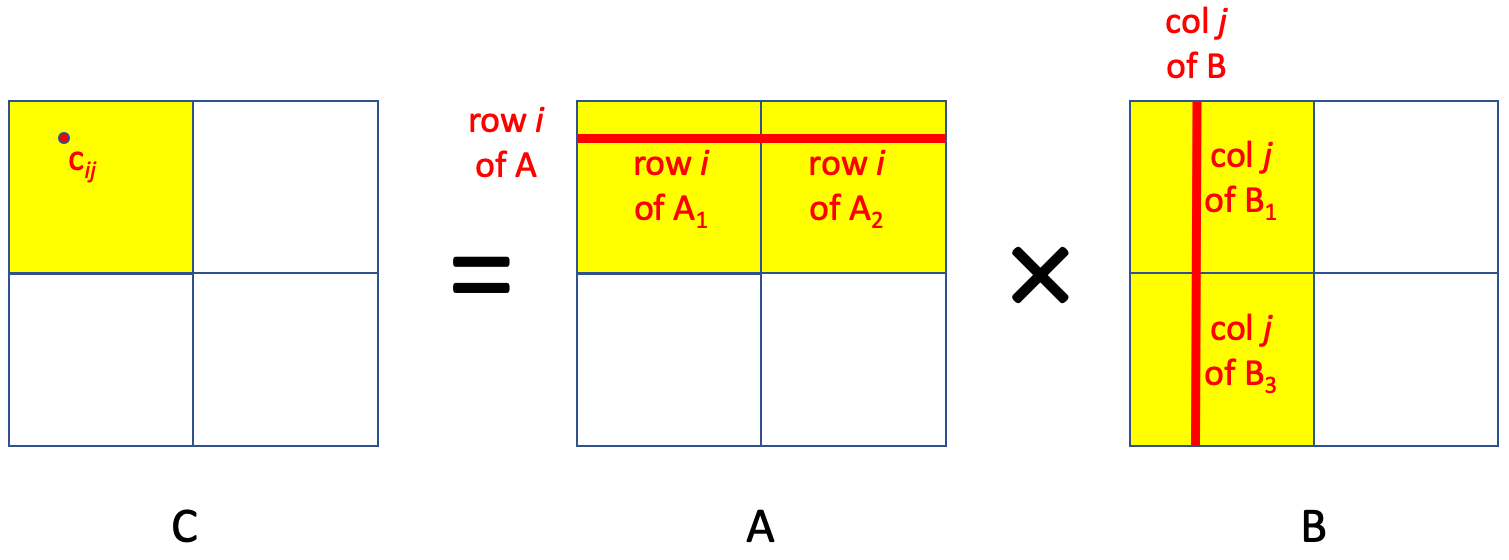

Consider $c_{ij}$, the $(i,j)$th entry of $C$, which is also the $(i,j)$th entry of $C_1$.
This is the dot product of the i-th row of $A$ with the j-th column of $B$, as shown above.
Immediately, we see that this only involves $A_1$, $A_2$, $B_1$, and $B_3$.

Moreover, when you take this dot product, you can see from the diagram that it is equal to the **dot product of row i of A₁ with column j of B₁** *plus* the **dot product of row i of A₂ with column j of B₃**.   But this is exactly the **sum of the (i,j)th entries of A₁B₁ and A₂B₃**, or equivalently the **(i,j)th entry of A₁B₁+A₂B₃**!

Since this is true for *all* the entries of $C_1$, we see that $C_1 = A_1 B_1+A_2 B_3$.

Note that this problem is just one example of a general principle: we can multiply ["blocked" matrices](https://en.wikipedia.org/wiki/Block_matrix) like this just by the same "rows times columns" rule we would use if the blocks $A_j$ and $B_k$ were numbers (except that the multiplications are non-commutative, i.e. the $A$ blocks always need to multiply the $B$ blocks from the left). Even more generally, we can think of "matrices" *made out* of linear operators, i.e. linear operators on bigger vector spaces made out of smaller ones.  

**(b)**

Check your answer with a random matrix in Julia:

## Solution (b)

In [9]:
# 4 random blocks of A
A1, A2, A3, A4 = rand(50,50), rand(50,50), rand(50,50), rand(50,50)

# 4 randdom blocks of B
B1, B2, B3, B4 = rand(50,50), rand(50,50), rand(50,50), rand(50,50)

# make A and B out of these blocks:
A = [A1 A2
     A3 A4]
B = [B1 B2
     B3 B4]

# make C = AB
C = A*B

# extract C₁ from the upper-left 50×50 block of C:
C1 = C[1:50, 1:50]

# finally, check that C1 equals (up to roundoff error) your formula from (a):

your_C1 =(A1*B1)+(A2*B3)      # ← YOUR (a) HERE ...some formula in terms of A1,A2,A3,A4,B1,B2,B3,B4

C1 ≈ your_C1    # should print "true"

true

## Problem 6 (3+3+3+3 points)

Suppose that we did something similar to Gaussian elimination on a matrix $A$, but with column operations rather than row operations, to turn it into the following matrix $B$:

$$
\underbrace{
\begin{pmatrix}
2 & 4 & 6 \\
3 & 1 & 10 \\
 & -1 & 3
\end{pmatrix}}_A \longrightarrow
\underbrace{\begin{pmatrix}
2 &  &  \\
3 & -5 & 1 \\
 & -1 & 3
\end{pmatrix}}_B
$$

For example, we subtracted twice the first column of $A$ from the second column
of $A$ to get the second column of $B$.

**(a)**

How did we get the third column of $B$ from columns of $A$?

## Solution (a)

We multiplied the first column of $A$ by 3 and subtracted it from the last column of $A$. 

**(b)**

You can represent these column operations as a matrix multiplying $A$ on the _________ (**left** or **right**).

## Solution (b)

**Right.** Row operations can be represented as a matrix multiplying on the left while column operations can be represented as a matrix multiplying on the right.

**(c)**

Following your answer from (a), write $B$ as a matrix product of $A$ with some other matrix $E$.

## Solution (c)

By part (b) we know that $E$ will multiply $A$ on the right. The first column of $B$ is the same as $A$ which means that the first column on $E$ will be $(1,0,0)$. The second column of $B$ was obtained by subtracting twice of the first column of $A$ from the second column of $A$ which means that the second column of $E$ will be $(-2,1,0)$. In part (a) we showed that the third column of $B$ was obtained by multiplying the first column of $A$ by 3 and substracting it from the last column of $A$ which means that the third column of $E$ will be $(-3,0,1)$. We get
$$
\boxed{E=
\begin{pmatrix}
1 & -2 & -3\\
0 & 1 & 0\\
0 & 0& 1
\end{pmatrix}} \, .
$$

**(d)**

Enter your `E` in Julia and check that `B` is indeed given by the product in your previous part.

## Solution (d)

In [10]:
A = [2 4 6; 3 1 10; 0 -1 3]
B = [2 0 0; 3 -5 1; 0 -1 3]

E = [1 -2 -3
     0  1  0
     0  0  1]

3×3 Matrix{Int64}:
 1  -2  -3
 0   1   0
 0   0   1

In [11]:
# check:
B == A*E

true